# Chapter 5: Probability Distributions
- **A probability distribution describes how data is spread out and how likely certain values are to occur. The majority of values are clustered around the mean and the ends where fewer values occur are called the tail ends..**

- **Probability is how you describe the likelihood of an event occuring ranging from 0 to 1**

- **A standard normal distribution is a normla distribution where the mean is zero and the standard deviation is one**



__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 
### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

# Latex Mode = ((use of the $)) in markdown

**Imports**

In [74]:
import math, matplotlib.pyplot as plt, numpy as np, pandas as pd
from stat import *

from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

**Definitions**

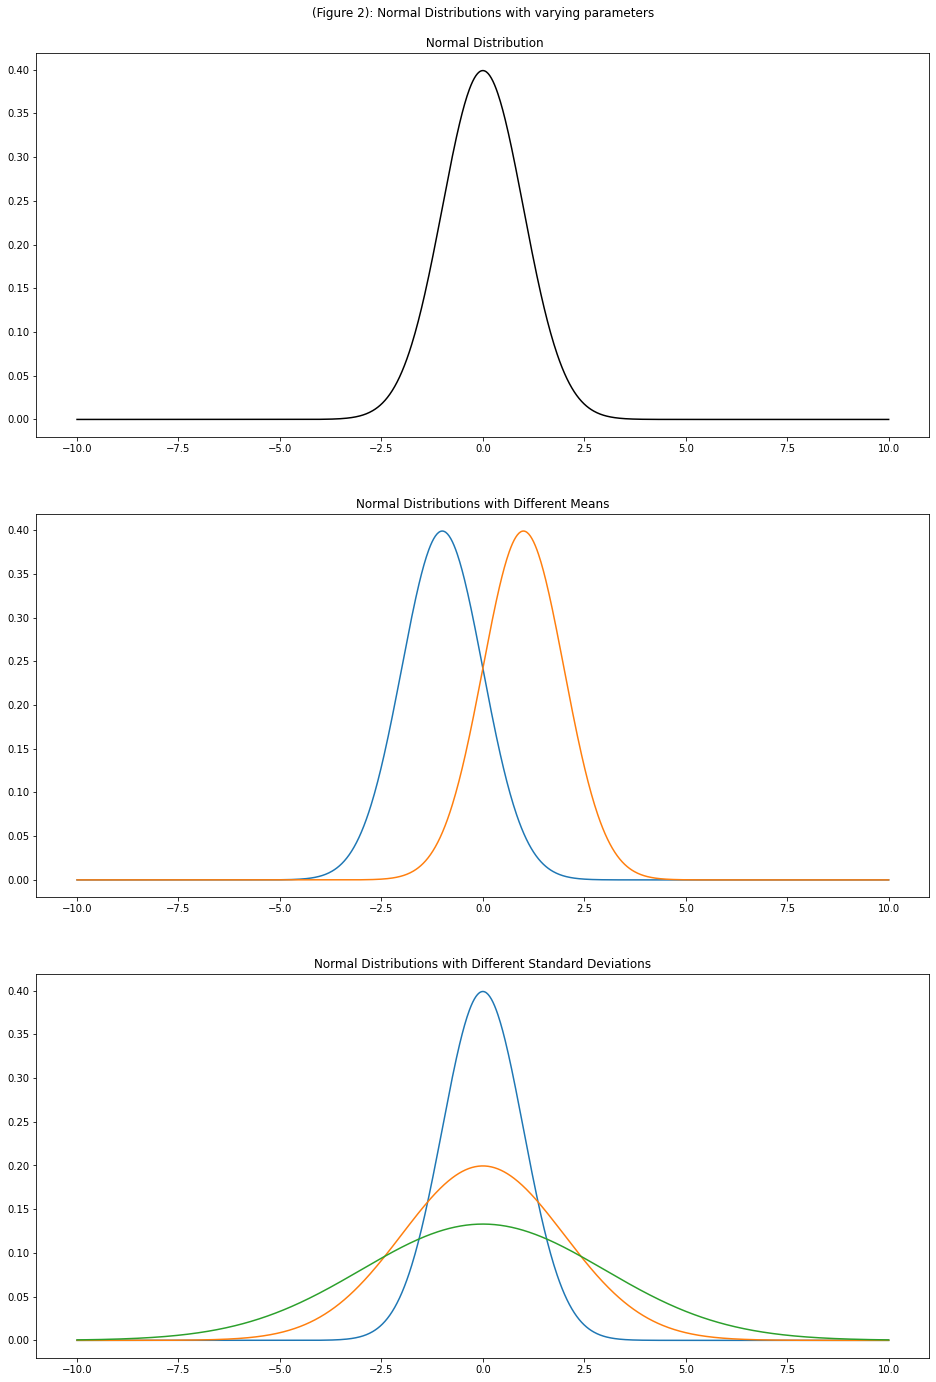

In [5]:
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000) ):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

# set up plot
fig, axs = plt.subplots(3, 1, figsize=(16, 24))
x = np.linspace(-10, 10, 1000)
# perform transformation
normal_dist_list = normal_dist(mean=0, sd=1)
axs[0].plot(x, normal_dist_list, label= "Normal Distribution", c='k')
axs[0].set_title("(Figure 2): Normal Distributions with varying parameters\n\n Normal Distribution")
# plot normal curves with varying means 
for mean_ in range(-1,3, 2):
    normal_dist_list = normal_dist(mean=mean_, sd=1)
    axs[1].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[1].set_title("Normal Distributions with Different Means")
    
# plot normal curves with varying standard deviations 
for sd in range(1,4):
    normal_dist_list = normal_dist(mean=0, sd=sd)
    axs[2].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[2].set_title("Normal Distributions with Different Standard Deviations")

#### These are all very self explanatory for anyone who has taken STAT330 and STAT331

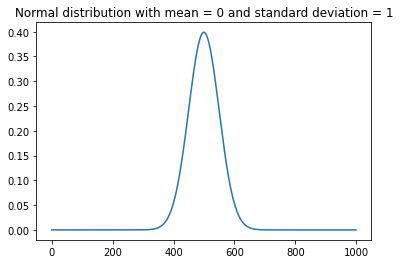

In [9]:
def normal_distribution(mu, sd, values):
    probdensity = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))
    return probdensity


# Generate a range of x values
values = np.linspace(-10,10,50)

mu = 0
sigma = 1
# Calculate the normal distribution at each x value
plot = normal_distribution(mu, sigma, values)

# Plot the normal distribution
plt.plot(plot)
plt.title('Normal distribution with mean = {} and standard deviation = {}'.format(mu, sigma))
plt.show()

###### If you do not make the data normalized you end up drawing incorrect inferences. The main point of this lesson is pro-tips for working with time-series data.

# Lognormal Distributions
- This is often referred to as z-score transformation
- We use these when the tails are extreme and with a positive skewness. So in order  to account for that effect we use a lognormal distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 


In [11]:
import warnings
warnings.filterwarnings("ignore")

def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    density_points = (1 / x*sd*np.sqrt(2*math.pi))*math.e**(-(np.log(x)-mean)**2 / (2*sd**2))
    return density_points

Text(0.5, 1.0, 'Lognormal Distribution with μ = 0 and σ = 1')

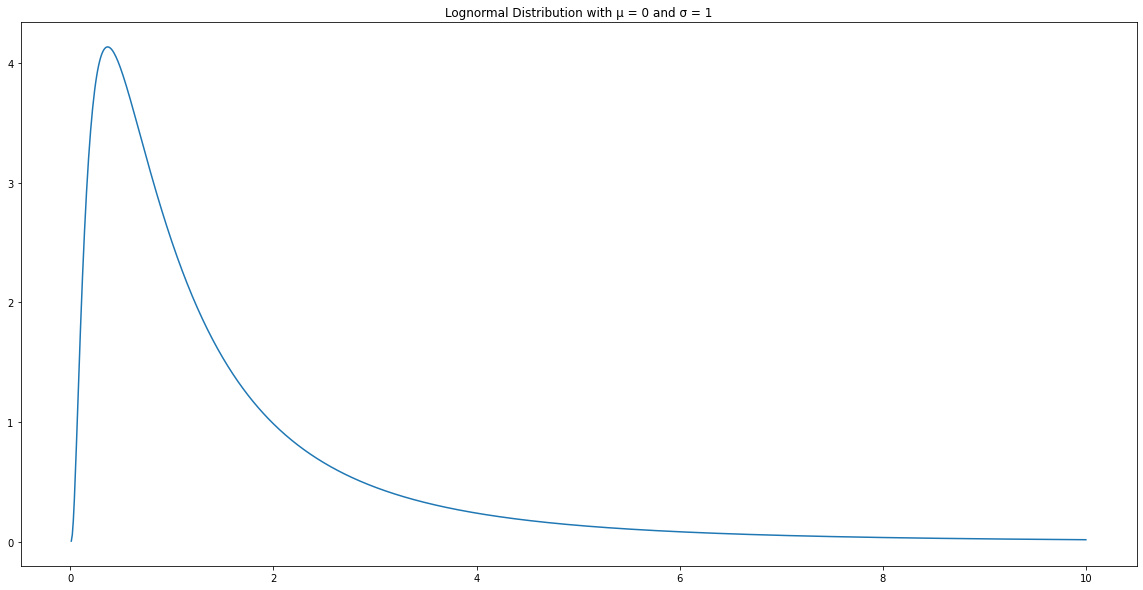

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, 10, 1000)
log_norm = create_lognormal(0, 1,x)
ax.plot(x, lognorm)
mean,sd=1,1
ax.set_title("Lognormal Distribution with μ = 0 and σ = 1")

Text(0.5, 1.0, 'Lognorm Distr con mu = 1 and sigma = 1')

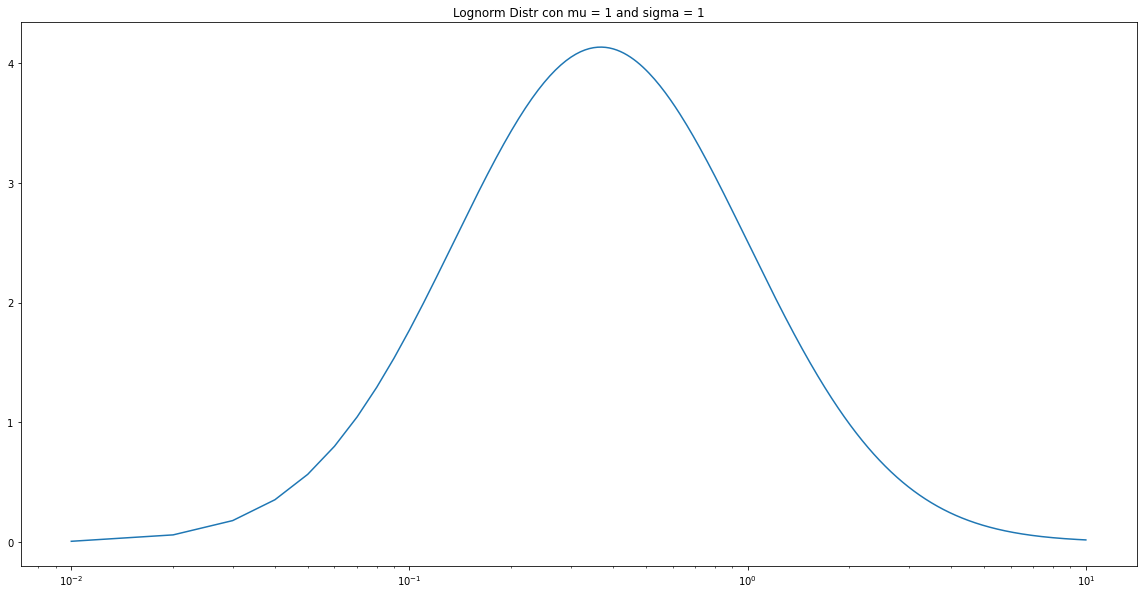

In [23]:
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,log_norm)
plt.xscale("log")
ax.set_title("Lognorm Distr con mu = " + str(mean) + " and sigma = " + str(sd))

# Binomial Distributions
- Use this where your outcomes are 0 or 1.

If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 

In [12]:
# build binomial function
def binomial(x, n, p):
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n - x)) * p**x * (1 - p)**(n - x)


In [13]:
binomial(x=50, n=100, p=.5)

0.07958923738717875

In [40]:
# Function to determine the probability of generating a total between x0 and x1 for a given p & n.

def prob_out(x0, x1, p, n):
    prob = 0
    for x in range(x0,x1+1):
        prob += binomial(x=x, n=n, p=p)
    return prob
p, n, x0, x1 = .5, 100, 40, 60

In [41]:
prob_out(x0, x1, p, n)

0.9647997997822952

In [44]:
p

0.5

n = 100
p = 0.5
P = 0
X0 = 40
X1 = 60
for x in range(X0, X1 +1):
    P += binomial(x=x,n=100,p=.5)
P

# More Imports

In [45]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

<ipython-input-54-875d01dd4587>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Blues")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


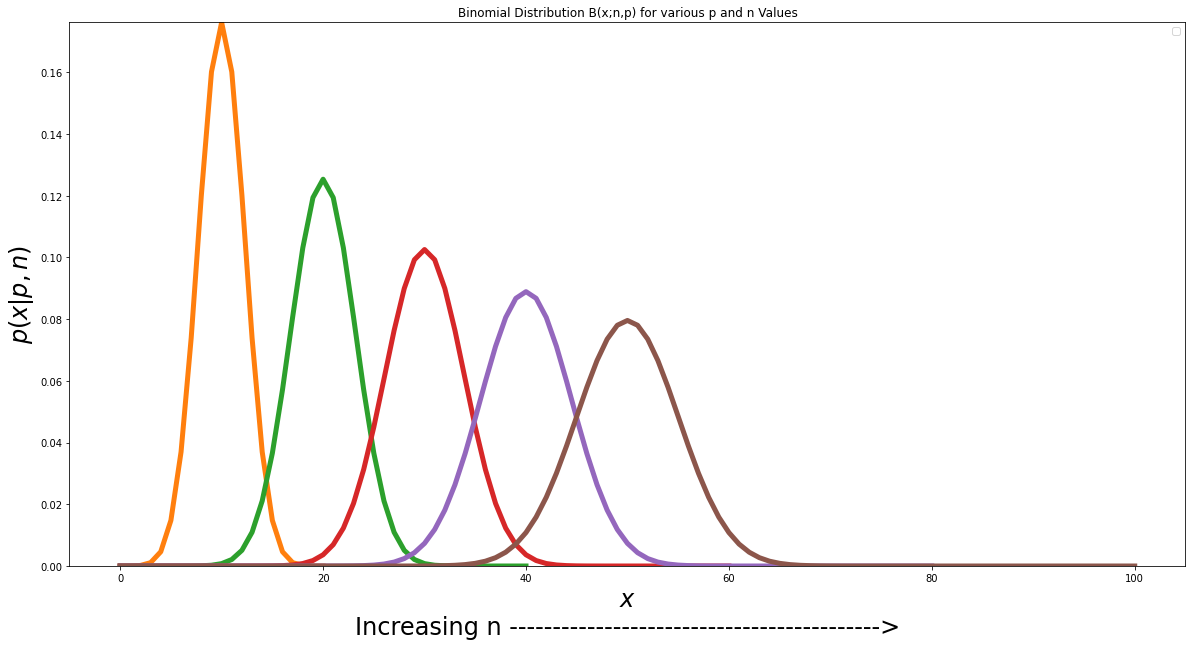

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
cmap = cm.get_cmap("Blues")
ymax = binomial(20 * p, 20, p)
for n in range(0,101,20):
    # List of probs for every possible outcome from 0 to n
    bivars = [binomial(x,n,p) for x in range(n+1)]
    # put them on a line
    plt.plot(bivars, linewidth=5)
ax.set_ylim(ymin=0,ymax=ymax)

# Put a title on it, make it look pretty
plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
plt.show()

In [55]:
# Imports for datareader, yf, datetime
import pandas_datareader.data as web, yfinance as yf, datetime

In [62]:
data_dict = {}
yf.pdr_override()
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()
stocks = ['AAPL', 'PG', 'TSLA']
for stonk in stocks:
    data_dict[stonk] = web.get_data_yahoo(stonk,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [66]:
data_dict['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500193,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567372,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706895,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839728,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400
...,...,...,...,...,...,...
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100


# Make a df for the close data of all the stonks

In [81]:
cls_data = pd.concat([df['Close'] for df in data_dict.values()], 
                    keys = data_dict.keys(),
                    axis = 1)

In [82]:
cls_data

,AAPL,PG,TSLA
Date,,,
2012-01-03,14.686786,66.830002,1.872000
2012-01-04,14.765714,66.800003,1.847333
2012-01-05,14.929643,66.519997,1.808000
2012-01-06,15.085714,66.360001,1.794000
2012-01-09,15.061786,66.639999,1.816667
...,...,...,...
2023-03-14,152.589996,139.850006,183.259995
2023-03-15,152.990005,141.830002,180.449997
2023-03-16,155.850006,142.889999,184.130005


Text(0.5, 1.0, 'Daily Stock Prices')

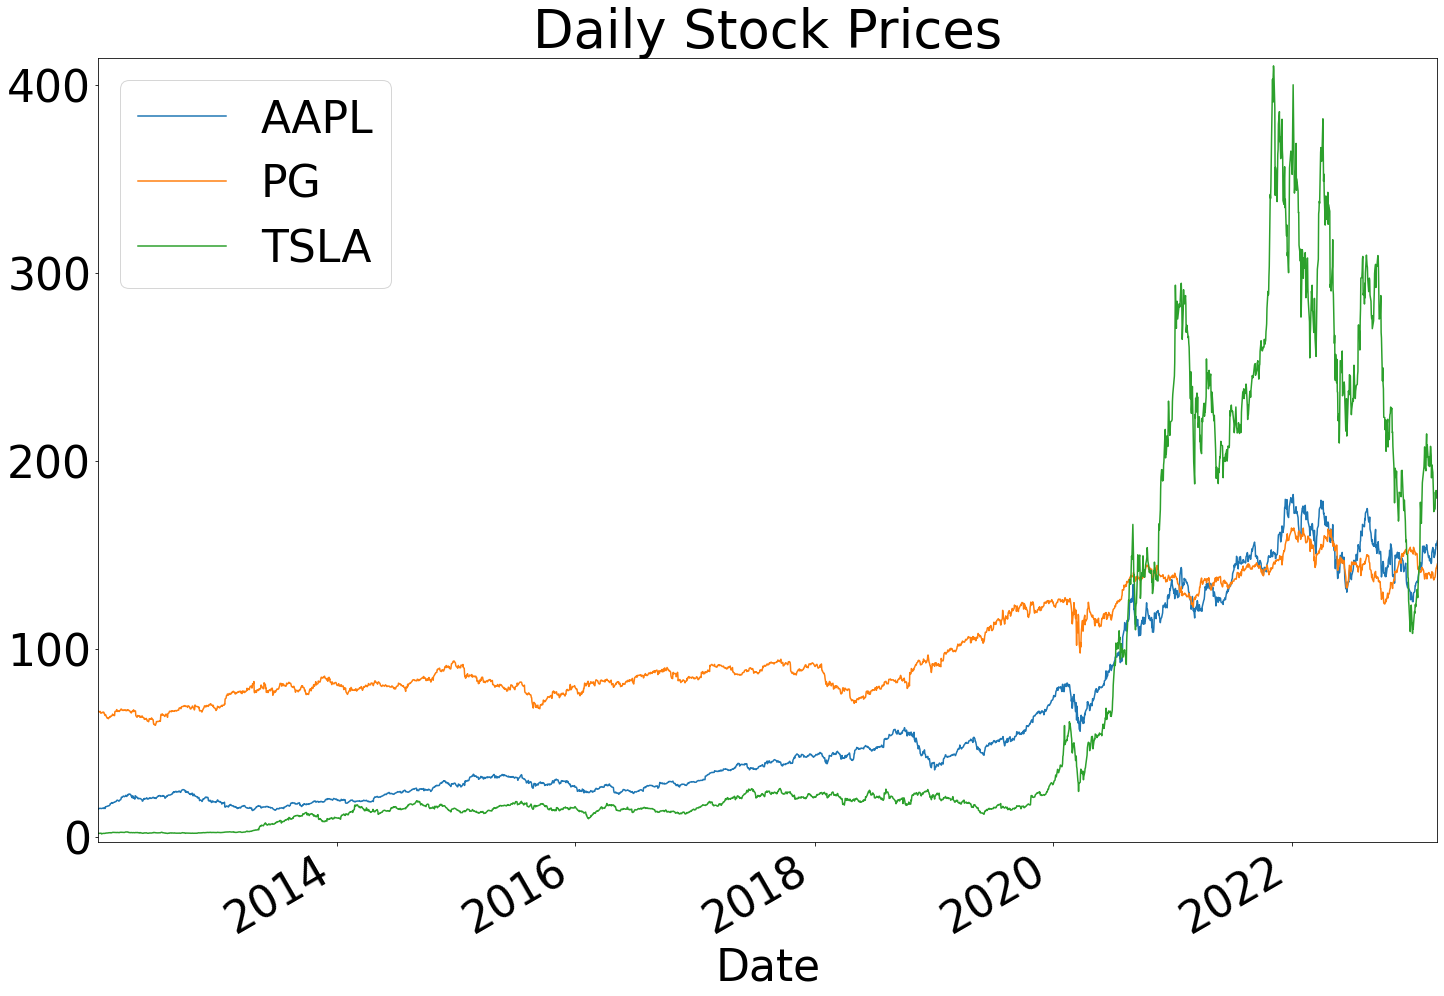

In [92]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams.update({'font.size':44})
fig,ax=plt.subplots(figsize=(24,16))
cls_data.plot.line(ax=ax,legend=True)
ax.set_title("Daily Stock Prices")

# Making comparisons using log scale
- Looking at change on a proportional basis rather than an absolute basis

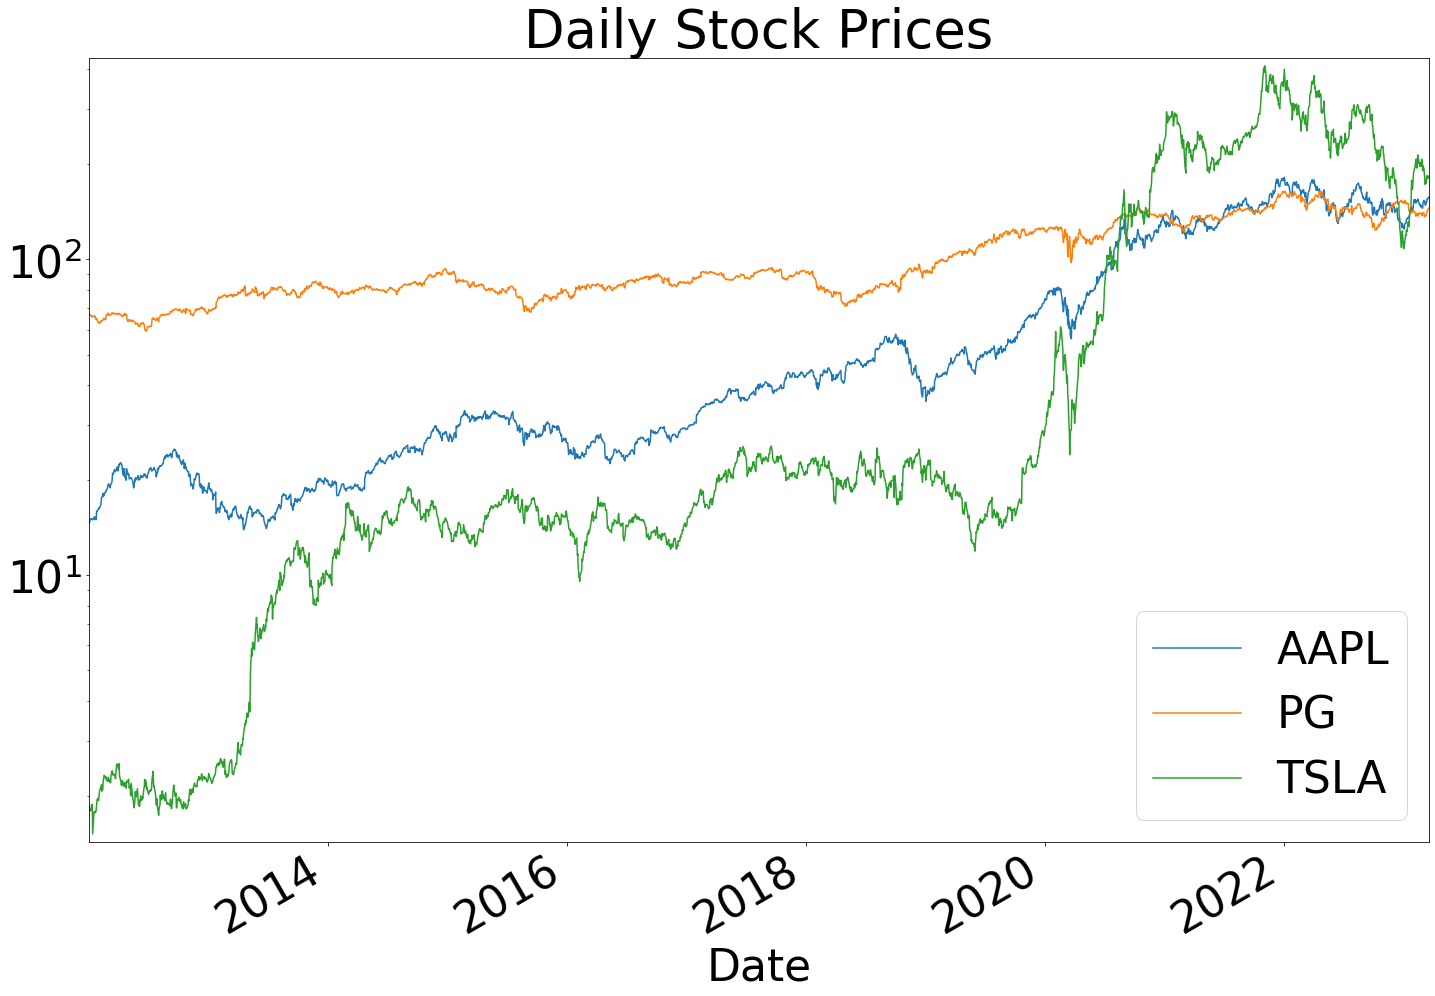

In [93]:
fig,ax=plt.subplots(figsize=(24,16))
cls_data.plot.line(ax=ax,legend=True)
ax.set_title("Daily Stock Prices")
ax.set_yscale('log')

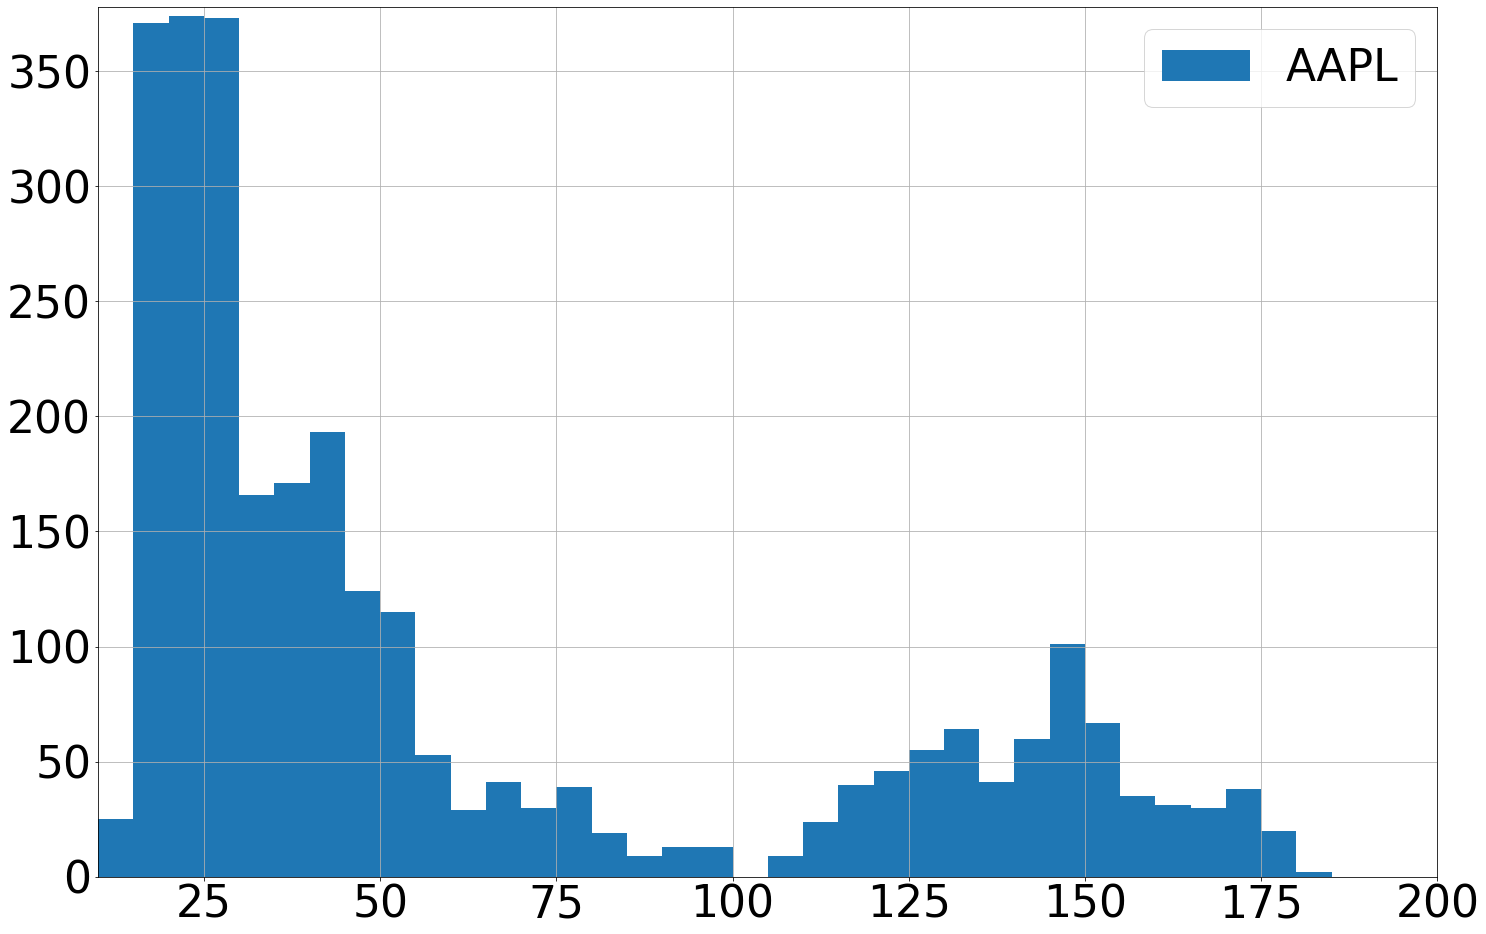

In [97]:
fig, ax = plt.subplots(figsize = (24, 16))
cls_data["AAPL"].hist(bins = [i for i in range(10,201,5)], label = "AAPL")
plt.legend()

In [98]:
stock = 'AAPL'
log_data=np.log(cls_data)

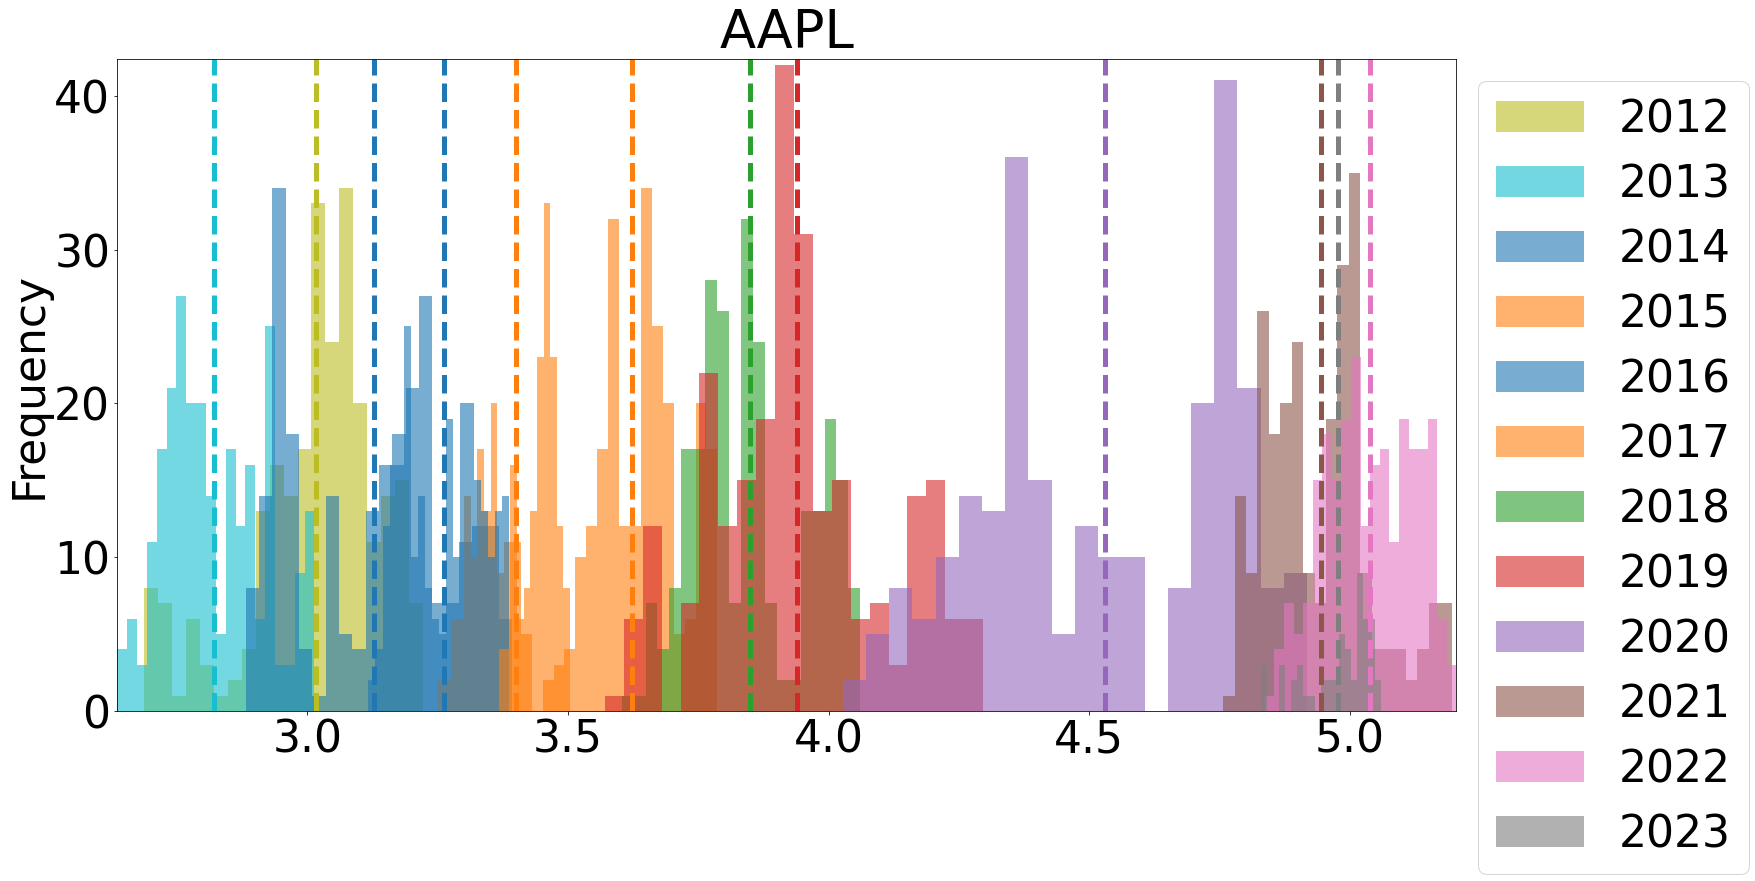

In [101]:
def yr_dist(data,stock,figsize=(24,12), density = False):
    yrs = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize=figsize)
    for year in yrs:
        color = 'C' + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color=color,
                           alpha = .6,
                           label = year,
                           bins = 20,
                           ax=ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = '--')
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1,1))
        
yr_dist(log_data,stock, density=False)

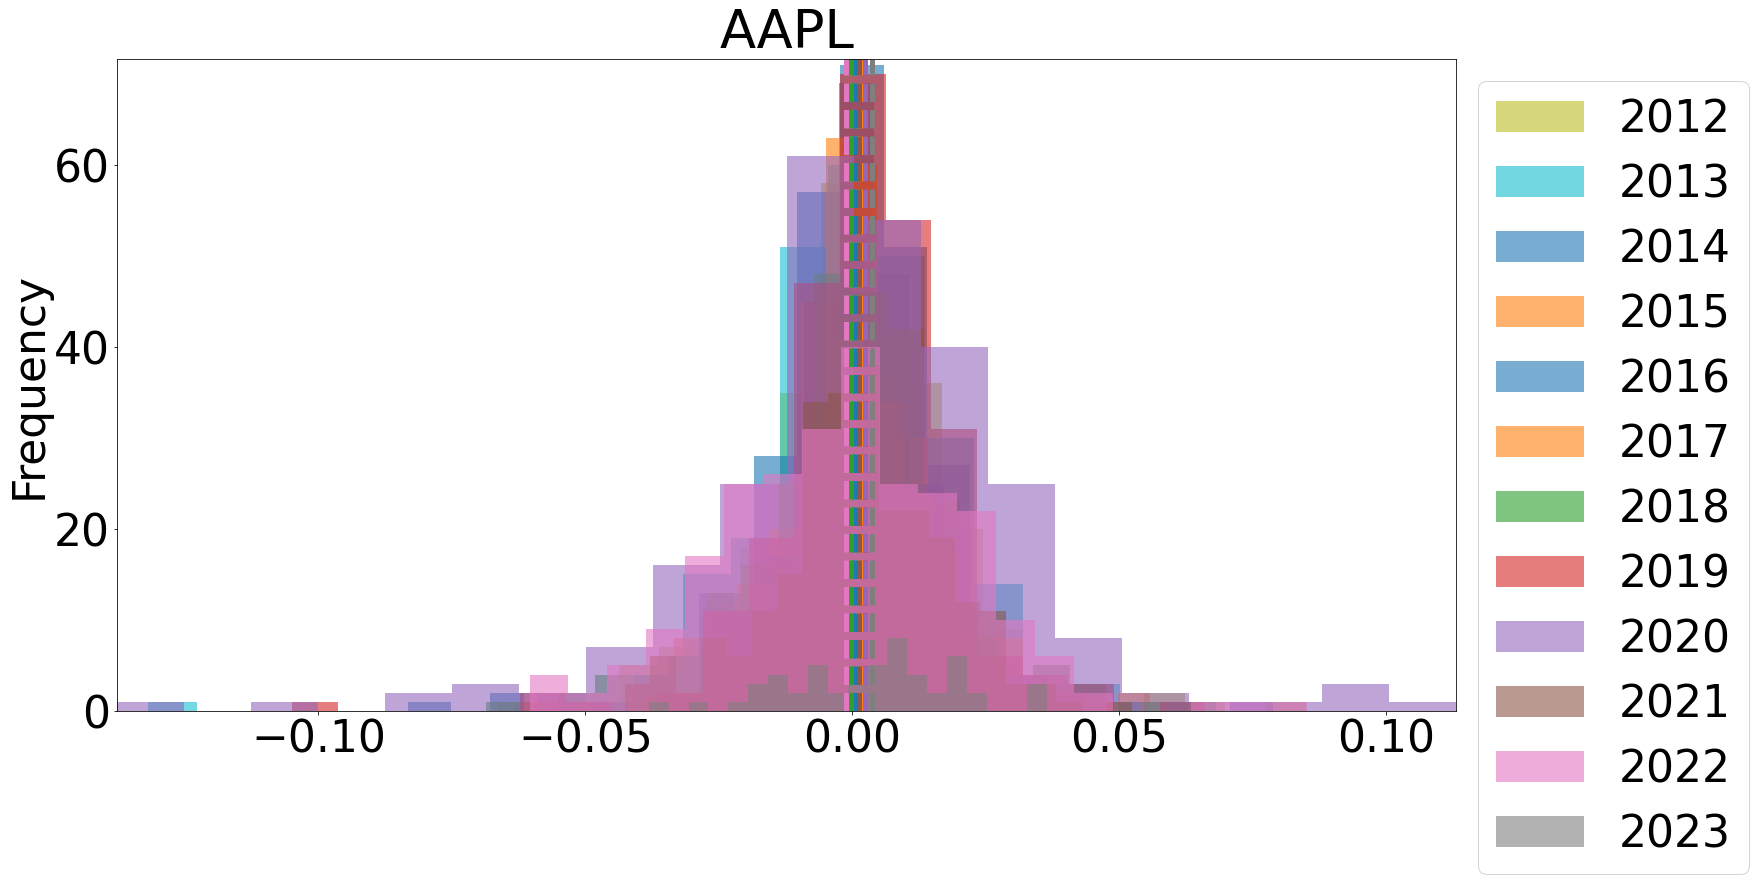

In [103]:
price_chg_data = log_data.diff()
yr_dist(price_chg_data,stock, density=False)